In [1]:
! pip3 install fastai==2.7.9
! pip3 install torch==1.12.0+cu116 -f https://download.pytorch.org/whl/torch_stable.html

In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.12.0+cu116
True


In [3]:
!nvidia-smi

Mon Nov 28 21:10:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.15       Driver Version: 512.15       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 34%   38C    P8    13W / 160W |    317MiB /  6144MiB |     12%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
ROOT_PATH = '/home/yasaisen/Desktop/09_research/09_research_main'

In [5]:
import torch
import numpy as np
import os
from fastai.vision import *
from fastai.metrics import *
from fastai.vision.all import *
from fastai.data.external import untar_data,URLs
from fastai.data.transforms import get_image_files
import fastai
from fastai import callback
from fastai.data.core import DataLoaders

c:\Users\user\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] 找不到指定的程序。
  warn(f"Failed to load image Python extension: {e}")


In [6]:
def checkpath(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [7]:
# model

Version = 'M_step4.2.0_f_rgb_3'

root_folder = os.path.abspath(os.path.join(ROOT_PATH, Version))

model_DIR = os.path.abspath(os.path.join(root_folder, 'model'))
checkpath(model_DIR)

In [8]:
classes = ['NORMAL', 'RLN', 'RSLN']
def get_label(GET, GETT):
  if GET == 'NORMAL': 
    return 0
  elif GET == 'RLN' : 
    return 1
  elif GET == 'RSLN': 
    return 2

In [9]:
# train_data = 'step_train'
# valid_data = 'valid'
# test_data = 'test'
# koko_dir = ROOT_PATH

# train_data = 'step_train_rgb'
# valid_data = valid_rgb'
# test_data = 'test_rgb'
# koko_dir = ROOT_PATH

# train_data = 'step_train_focused'
# valid_data = 'valid_focused'
# test_data = 'test_focused'
# koko_dir = ROOT_PATH

train_data = 'step_train_rgb_focused'
valid_data = 'valid_rgb_focused'
_valid_data = 'valid_focused'
koko_dir = ROOT_PATH

In [10]:
dblock = DataBlock( blocks = (ImageBlock, CategoryBlock),
                    get_items=partial(get_image_files,folders=[train_data, valid_data, _valid_data]),
                    splitter=FuncSplitter(lambda s: Path(s).parent.name == valid_data),
                    get_y=lambda x:get_label(x.stem.split('_')[0], x.stem.split('_')[1]),
                    item_tfms=Resize(540),
                    batch_tfms=[*aug_transforms(size=540, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [11]:
dls = dblock.dataloaders(source=koko_dir, bs=24)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [12]:
metrics = [accuracy]

callback_fns = [callback.tracker.ShowGraphCallback]

learner = vision_learner(dls, models.resnet34, metrics=metrics, loss_func=CrossEntropyLossFlat())#, callback_fns=callback_fns)
# learner.model_dir = model_DIR

c:\Users\user\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0012022644514217973)

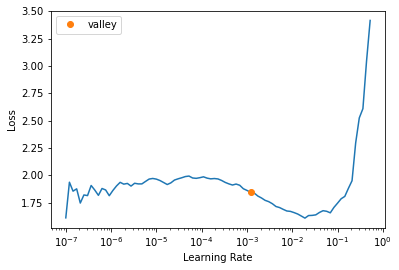

In [13]:
learner.lr_find()

In [15]:
learner.fit_one_cycle(8, 0.0012022644514217973)

epoch,train_loss,valid_loss,accuracy,time
0,1.321904,1.378811,0.426305,01:49
1,0.887666,1.206091,0.582907,01:48
2,0.548296,2.068266,0.417093,01:49
3,0.404756,1.533231,0.513306,01:49
4,0.335658,1.656753,0.430399,01:49
5,0.247974,1.638516,0.419652,01:47
6,0.237407,1.751397,0.443705,01:47
7,0.216729,1.498688,0.479529,01:48


In [16]:
learner.save(model_DIR)

Path('C:/Users/user/Desktop/221128/M_step4.2.0_f_rgb_3/model.pth')

# Predictions

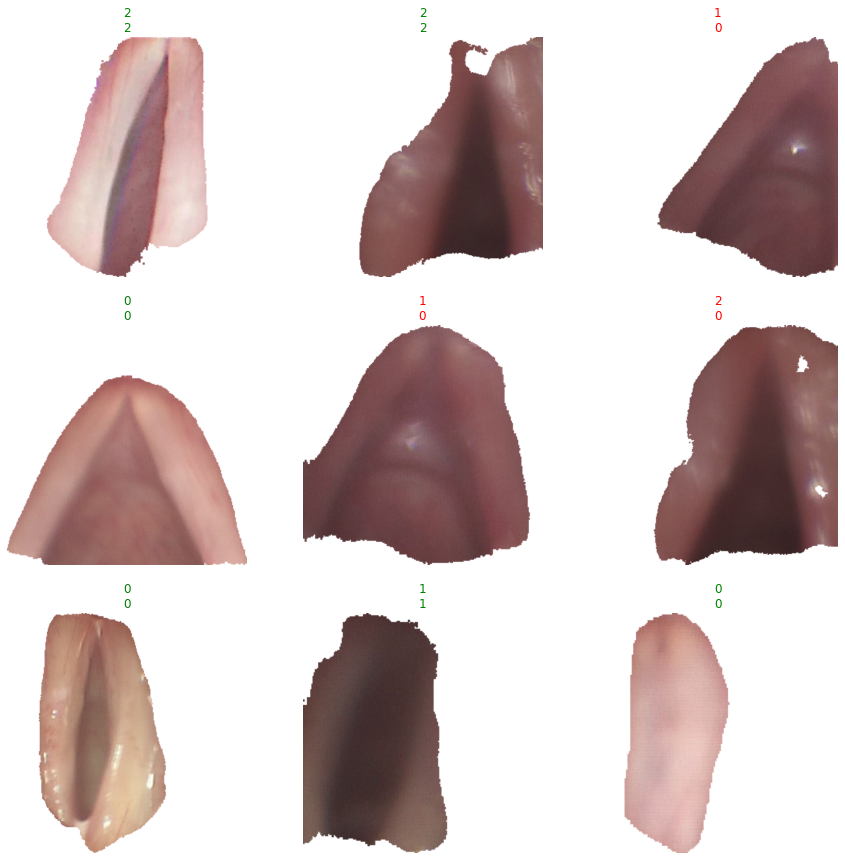

In [17]:
learner.show_results(figsize=(15,15))

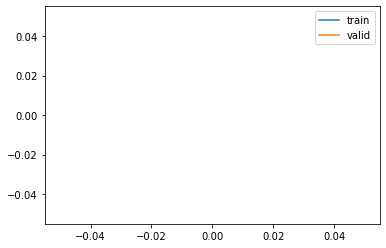

In [18]:
learner.recorder.plot_loss()

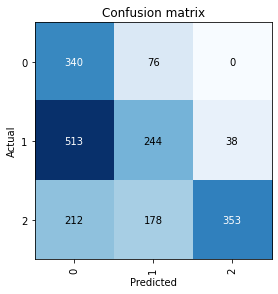

In [19]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

In [20]:
dblock_valid = DataBlock( blocks = (ImageBlock, CategoryBlock),
                    get_items = get_files,
                    get_y = lambda x:get_label(x.stem.split('_')[0], x.stem.split('_')[1]),
                    item_tfms = Resize(540))

In [21]:
dls_valid = dblock_valid.dataloaders(source=os.path.join(ROOT_PATH, valid_data), bs=24)

IndexError: list index out of range

In [ ]:
interp = ClassificationInterpretation.from_learner(learner, dls_valid)
interp.plot_confusion_matrix()

TypeError: list indices must be integers or slices, not DataLoaders

In [ ]:
dblock_test = DataBlock( blocks = (ImageBlock, CategoryBlock),
                    get_items = get_files,
                    get_y = lambda x:get_label(x.stem.split('_')[0], x.stem.split('_')[1]),
                    item_tfms = Resize(540))

In [ ]:
dls_test = dblock_test.dataloaders(source=os.path.join(ROOT_PATH, test_data), bs=24)

In [ ]:
interp = ClassificationInterpretation.from_learner(learner, dls_test)
interp.plot_confusion_matrix()